# **1. Perkenalan Dataset**


### Dataset yang digunakan dalam analisis ini berisi informasi mengenai 8.681 restoran, mencakup berbagai atribut untuk menggambarkan karakteristik setiap restoran. Kolom-kolom dalam dataset meliputi ID, Area dan City yang menunjukkan lokasi restoran, Restaurant sebagai nama restoran, serta Price yang merepresentasikan kisaran harga makanan di restoran tersebut. Selain itu, terdapat atribut Avg Rating dan Total Ratings yang mencerminkan kualitas restoran berdasarkan ulasan pelanggan. Dataset ini juga mencakup informasi tentang Food Type, yang menggambarkan jenis makanan yang disediakan, Address sebagai lokasi lengkap restoran, dan Delivery Time yang menunjukkan waktu pengiriman.

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib import rcParams
from IPython.display import display

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('swiggy.csv')
df.sample(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
6993,55079,Navrangpura,Ahmedabad,Neelam Sandwich & Pizza,300.0,4.2,50,"Snacks,Beverages",Navrangpura,45
628,25844,Koregaon Park,Pune,Sassy Teaspoon,800.0,4.6,100,"Ice Cream,Desserts,Bakery",Koregaon Park,47
3058,305154,Andheri East,Mumbai,The White Barn,750.0,4.4,20,"American,Fast Food,Indian,Pastas,Chinese,Kebab...",Andheri East,58
2992,299751,Alwarpet,Chennai,Cappuccino At Crowne Plaza Chennai,300.0,4.5,20,"North Indian,Indian,Salads,Biryani,Chinese,Jui...",Austin Nagar,77
1356,70522,Begampura,Surat,Taste Of Bhagwati,330.0,4.0,100,"North Indian,Chinese,Oriental,Continental,Dess...",Textile Market Ring Road,45


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### A .Memahami Struktur Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.2+ KB


In [4]:
df.describe(include='all')

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
count,8680.000000,8680,8680,8680,8680.000000,8680.000000,8680.000000,8680,8680,8680.000000
unique,NaN,833,9,7865,NaN,NaN,NaN,3734,2339,NaN
top,NaN,Rohini,Kolkata,La Pino'Z Pizza,NaN,NaN,NaN,Indian,Rohini,NaN
freq,NaN,257,1346,13,NaN,NaN,NaN,389,229,NaN
mean,244812.071429,NaN,NaN,NaN,348.444470,3.655104,156.634793,NaN,NaN,53.967051
std,158671.617188,NaN,NaN,NaN,230.940074,0.647629,391.448014,NaN,NaN,14.292335
min,211.000000,NaN,NaN,NaN,0.000000,2.000000,20.000000,NaN,NaN,20.000000
25%,72664.000000,NaN,NaN,NaN,200.000000,2.900000,50.000000,NaN,NaN,44.000000
50%,283442.000000,NaN,NaN,NaN,300.000000,3.900000,80.000000,NaN,NaN,53.000000
75%,393425.250000,NaN,NaN,NaN,400.000000,4.200000,100.000000,NaN,NaN,64.000000


### B. Menangani Data Yang Hilang

In [5]:
missing_value = df.isna().sum()

missing_value

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

### C. Analisis Distribusi, Korelasi, dan Visualisasi Data pada Dataset Fitur Numerik

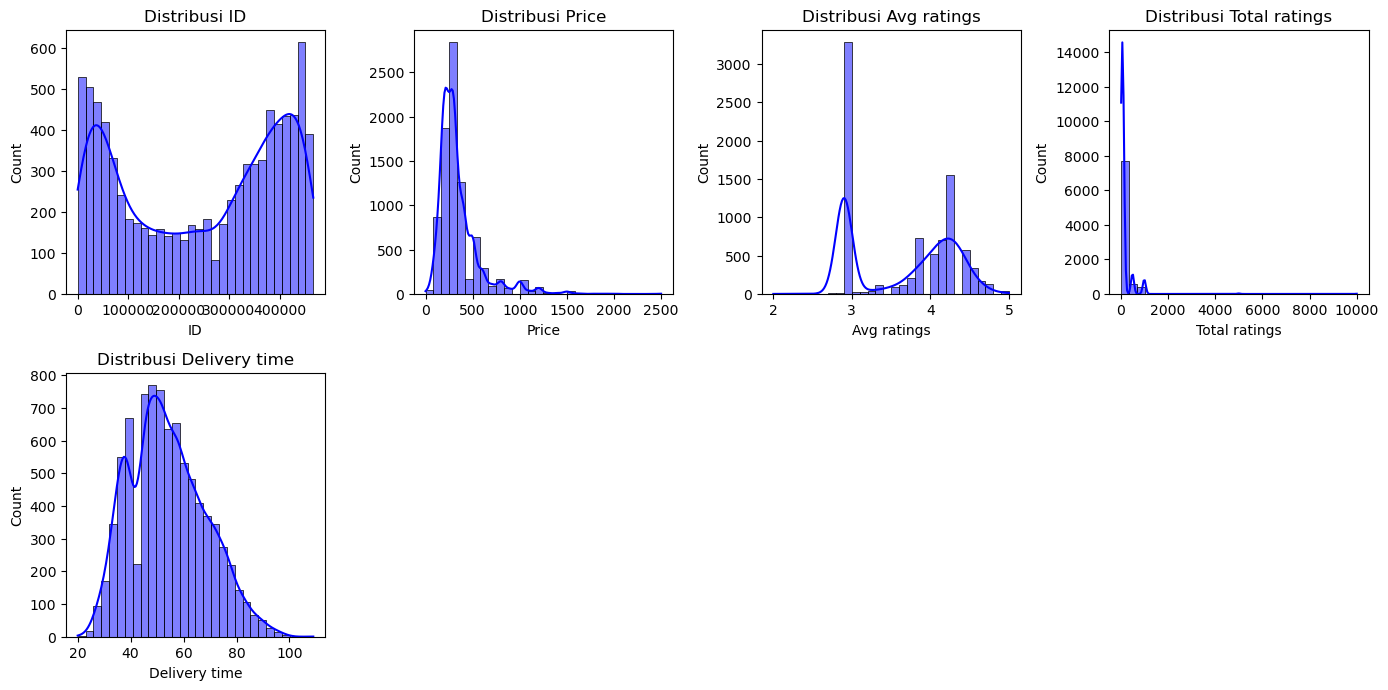

In [6]:
# Distribusi fitur numerik
numerik = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerik.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()


### D. Analisis Distribusi, Korelasi, dan Visualisasi Data pada Dataset Fitur Kategorikal


Plotting Area: 10 kategori
Plotting City: 9 kategori
Plotting Restaurant: 10 kategori
Plotting Food type: 10 kategori
Plotting Address: 10 kategori


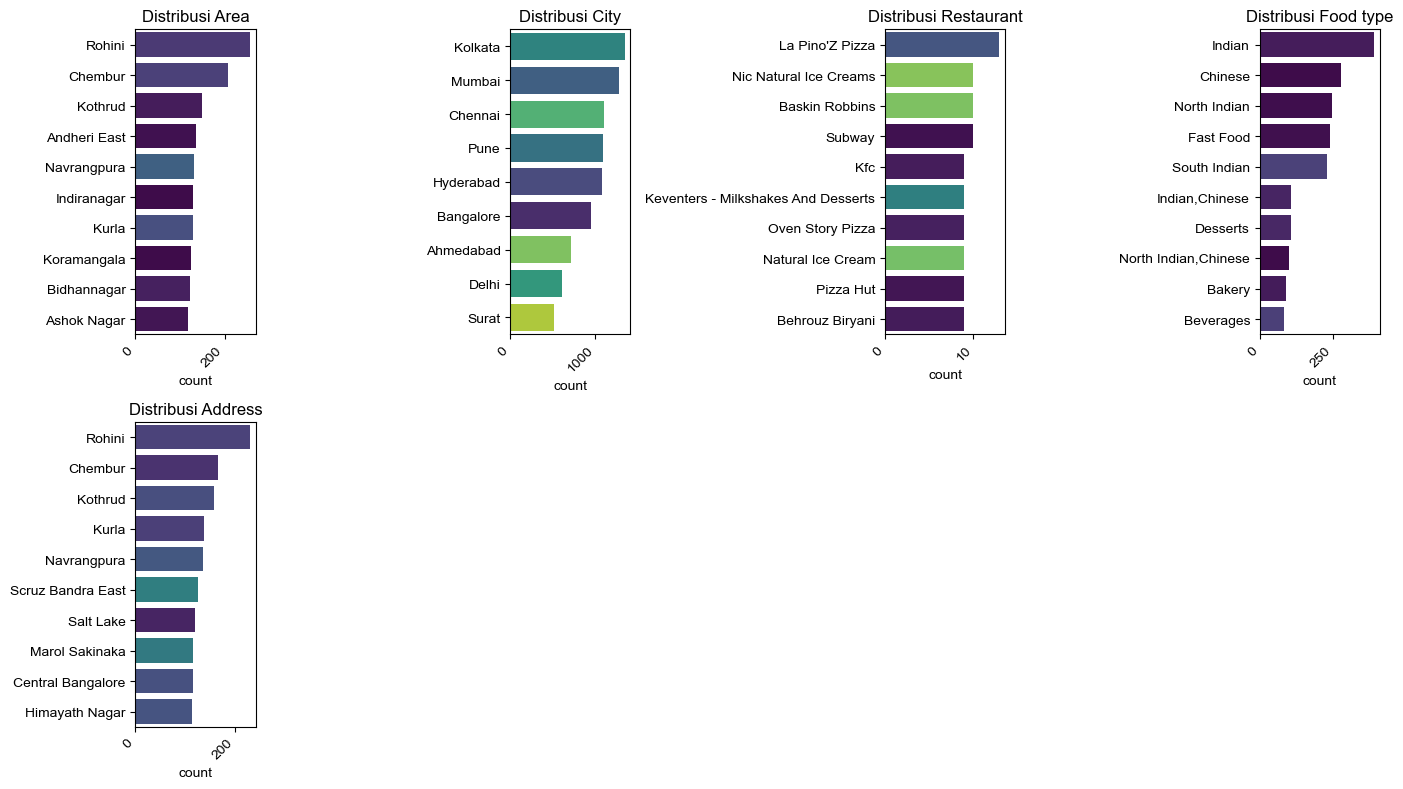

In [7]:
rcParams['font.family'] = 'Arial'

kategori = df.select_dtypes(include=[object])


n_cols = 4
n_rows = -(-len(kategori.columns) // n_cols)  

max_kategori = 10  

plt.figure(figsize=(14, 4 * n_rows))

for i, column in enumerate(kategori.columns, 1):
    
    top_kategori = df[column].value_counts().nlargest(max_kategori)
    
    plt.subplot(n_rows, n_cols, i)
    
   
    sns.countplot(y=df[column], order=top_kategori.index, palette='viridis', hue=df[column], legend=False)
    
    plt.title(f'Distribusi {column}')
    plt.ylabel('')  
    plt.xticks(rotation=45, ha='right')
    print(f"Plotting {column}: {len(top_kategori)} kategori")

plt.tight_layout()
plt.show()


#### Insight :
- Setelah melakukan identifikasi missing value pada dataset, nampaknya dataset tersebut tidak memilki missing value. Sehingga tidak perlu melakukan penanganan data yang hilang
- Pada fitur kategorikal karena keragaman yang besar, maka saya hanya mengambil 10 ranking terbesar untuk ditampilkan pada visualisasi data


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

### A. Menghapus kolom yang tidak relevan untuk pelatihan model

In [8]:
data_cleaned = df.drop(['ID', 'Restaurant', 'Address','Area'], axis=1)

data_cleaned.head()

,City,Price,Avg ratings,Total ratings,Food type,Delivery time
0,Bangalore,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",59
1,Bangalore,300.0,4.1,100,"Mughlai,Lucknowi",56
2,Bangalore,650.0,4.4,100,Chinese,50
3,Bangalore,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",57
4,Bangalore,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",63


### B. Melakukan Encoding untuk fitur kategorikal

In [ ]:
kategori = ['City', 'Food type']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_kategori = encoder.fit_transform(data_cleaned[kategori])

encoded_kategori

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### C. Melakukan Normalisasi pada fitur Numerik dengan MinMax

In [10]:
numerik = ['Price' , 'Avg ratings', 'Delivery time', 'Total ratings']
scaler = MinMaxScaler()
scaled_numerik = scaler.fit_transform(data_cleaned[numerik])

scaled_numerik

array([[0.12      , 0.8       , 0.43820225, 0.00801603],
       [0.12      , 0.7       , 0.40449438, 0.00801603],
       [0.26      , 0.8       , 0.33707865, 0.00801603],
       ...,
       [0.06      , 0.3       , 0.42696629, 0.00601202],
       [0.06      , 0.3       , 0.08988764, 0.00601202],
       [0.1       , 0.3       , 0.26966292, 0.00601202]])

### D. Melakukan Penggabungan kembali antara Fitur Kategorikal dan Fitur Numerik yang sebelumnya telah di proses

In [11]:
processed_data = np.hstack((scaled_numerik, encoded_kategori))

processed_data


array([[0.12      , 0.8       , 0.43820225, ..., 0.        , 0.        ,
        0.        ],
       [0.12      , 0.7       , 0.40449438, ..., 0.        , 0.        ,
        0.        ],
       [0.26      , 0.8       , 0.33707865, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06      , 0.3       , 0.42696629, ..., 0.        , 0.        ,
        0.        ],
       [0.06      , 0.3       , 0.08988764, ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.3       , 0.26966292, ..., 0.        , 0.        ,
        0.        ]])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [13]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

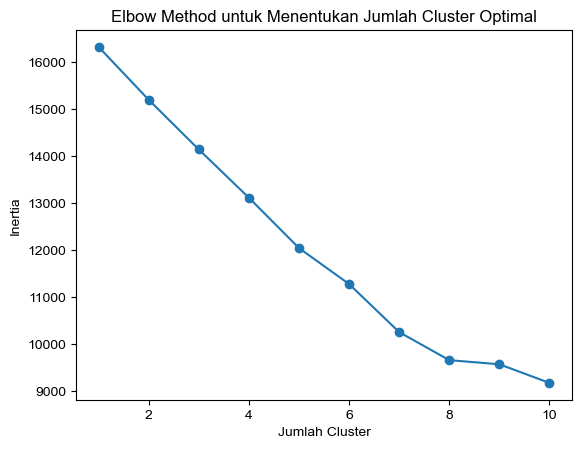

In [14]:
import matplotlib.pyplot as plt

# Menentukan jumlah cluster optimal dengan Elbow Method
inertia = []
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans_temp = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_temp.fit(processed_data)
    inertia.append(kmeans_temp.inertia_)

# Visualisasi Elbow Method
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()


In [15]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(processed_data)

KMeans(random_state=42)

In [16]:
# Menghitung Silhouette Score untuk model KMeans yang telah dilatih
silhouette_avg = silhouette_score(processed_data, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.2251565075694942


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [17]:
# Reduksi Dimensi dengan PCA
pca = PCA(n_components=5) 
pca_result = pca.fit_transform(processed_data)

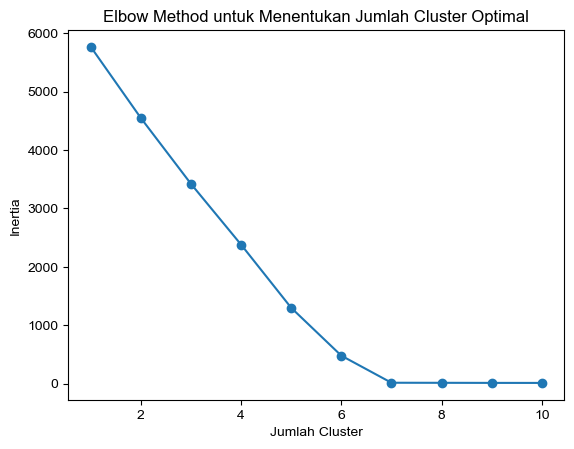

In [18]:
# Menentukan Jumlah Cluster Optimal dengan Elbow Method
inertia = []
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_result) 
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

In [19]:
# Menentukan Jumlah Cluster Optimal dari Grafik Elbow
best_k = 7 
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

In [20]:
# Evaluasi Silhouette Score
silhouette_avg_kmeans_pca = silhouette_score(pca_result, kmeans_labels)
print(f"Silhouette Score dengan PCA: {silhouette_avg_kmeans_pca}")


Silhouette Score dengan PCA: 0.9402070926600687


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

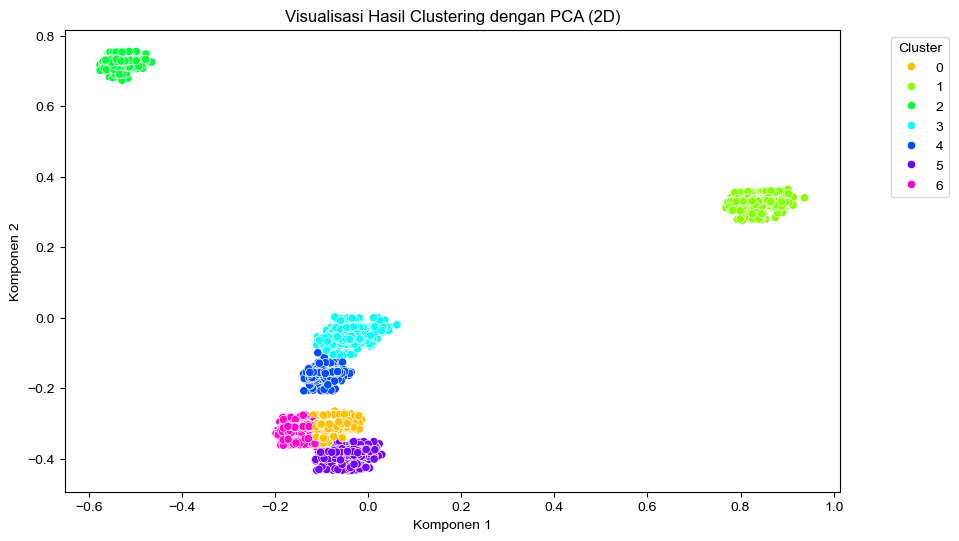

In [21]:
#reduksi 2d
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(processed_data)


kmeans_2d = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels_2d = kmeans_2d.fit_predict(pca_result_2d)



plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_result_2d[:, 0],
    y=pca_result_2d[:, 1],
    hue=kmeans_labels_2d,
    palette=sns.color_palette('hsv', best_k),
    legend='full'
)
plt.title("Visualisasi Hasil Clustering dengan PCA (2D)")
plt.xlabel("Komponen 1")
plt.ylabel("Komponen 2")
plt.legend(title="Cluster", loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [22]:
df['cluster'] = kmeans_labels

In [23]:
delivery_time = df.groupby('cluster')['Delivery time'].describe()
print(delivery_time)

          count       mean        std   min   25%   50%   75%    max
cluster                                                             
0        1090.0  55.854128  14.191845  26.0  45.0  56.0  67.0   89.0
1        1346.0  67.809807  14.177298  31.0  58.0  69.0  78.0  109.0
2        1840.0  47.760870  12.044886  21.0  38.0  46.5  54.0   90.0
3        1106.0  58.968354  12.892240  27.0  50.0  59.0  69.0   94.0
4        1277.0  48.318716   8.148373  24.0  42.0  49.0  54.0   77.0
5        1075.0  49.933023  14.914067  20.0  37.0  49.0  63.0   92.0
6         946.0  50.529598   9.164440  28.0  45.0  52.0  57.0   78.0


In [24]:
price = df.groupby('cluster')['Price'].describe()
print(price)

          count        mean         std   min    25%    50%    75%     max
cluster                                                                   
0        1090.0  353.763303  221.303935   1.0  200.0  300.0  400.0  2000.0
1        1346.0  362.294205  241.010804  10.0  200.0  300.0  400.0  1600.0
2        1840.0  309.822283  168.624704   0.0  200.0  300.0  352.5  1650.0
3        1106.0  356.247740  262.574015   0.0  200.0  300.0  400.0  2500.0
4        1277.0  393.794832  257.942076   1.0  250.0  300.0  500.0  2500.0
5        1075.0  299.926512  194.710144   2.0  200.0  250.0  350.0  1700.0
6         946.0  382.524313  268.195905  15.0  200.0  300.0  450.0  2500.0


In [25]:
avg_ratings = df.groupby('cluster')['Avg ratings'].describe()
print(avg_ratings)

          count      mean       std  min  25%  50%  75%  max
cluster                                                     
0        1090.0  3.550183  0.666890  2.0  2.9  3.5  4.2  5.0
1        1346.0  3.698811  0.660336  2.3  2.9  3.9  4.3  5.0
2        1840.0  3.568641  0.629863  2.4  2.9  3.7  4.2  5.0
3        1106.0  3.776311  0.643758  2.7  2.9  4.0  4.3  5.0
4        1277.0  3.599374  0.661526  2.7  2.9  3.8  4.2  5.0
5        1075.0  3.701395  0.579979  2.2  2.9  3.9  4.2  5.0
6         946.0  3.762896  0.650883  2.5  2.9  4.1  4.3  5.0


In [26]:
city = df.groupby('cluster')['City'].describe()
print(city)

        count unique        top  freq
cluster                              
0        1090      1       Pune  1090
1        1346      1    Kolkata  1346
2        1840      3  Ahmedabad   717
3        1106      1    Chennai  1106
4        1277      1     Mumbai  1277
5        1075      1  Hyderabad  1075
6         946      1  Bangalore   946


In [27]:
food_type = df.groupby('cluster')['Food type'].describe()
print(food_type)

        count unique           top freq
cluster                                
0        1090    591       Chinese   48
1        1346    786        Indian   66
2        1840    903        Indian  100
3        1106    667        Indian   56
4        1277    769       Chinese   64
5        1075    612  South Indian   76
6         946    645  South Indian   32


In [28]:
total_rating = df.groupby('cluster')["Total ratings"].describe()
print(total_rating)

          count        mean         std   min   25%   50%    75%      max
cluster                                                                  
0        1090.0  112.834862  174.439520  20.0  50.0  80.0  100.0   1000.0
1        1346.0  163.298663  350.113050  20.0  50.0  80.0  100.0   5000.0
2        1840.0  117.505435  205.630438  20.0  50.0  80.0  100.0   5000.0
3        1106.0  161.717902  281.200297  20.0  50.0  80.0  100.0   5000.0
4        1277.0  118.214565  220.292498  20.0  50.0  80.0  100.0   5000.0
5        1075.0  307.227907  877.727056  20.0  50.0  80.0  100.0  10000.0
6         946.0  148.520085  220.852912  20.0  50.0  80.0  100.0   1000.0


Hasil interpretasi :
1. Cluster 0:
- Waktu pengiriman rata-rata: 55.85 menit.
- Harga rata-rata: 353.76.
- Rating rata-rata: 3.55 (rendah dibanding cluster lain).
- Dominasi kota: Pune.
- Jenis makanan: Chinese.
Kesimpulan: Cluster ini mencakup restoran dengan waktu pengiriman sedang, harga sedang, dan rating yang relatif rendah. Restoran di cluster ini umumnya melayani masakan Chinese dan berlokasi di Pune. Strategi perbaikan mungkin dapat difokuskan pada peningkatan kualitas layanan untuk meningkatkan rating.

2. Cluster 1: 
- Waktu pengiriman rata-rata: 67.81 menit (terlama).
- Harga rata-rata: 362.29.
- Rating rata-rata: 3.70.
- Dominasi kota: Kolkata.
- Jenis makanan: Indian.
Kesimpulan: Restoran dalam cluster ini memiliki waktu pengiriman yang paling lama dibandingkan cluster lain, meskipun ratingnya masih cukup baik. Fokus pada masakan Indian di Kolkata menunjukkan potensi pasar, namun waktu pengiriman yang lama dapat menjadi kendala yang perlu diperbaiki untuk meningkatkan kepuasan pelanggan.

3. Cluster 2: 
- Waktu pengiriman rata-rata: 47.76 menit (tercepat).
- Harga rata-rata: 309.82 (terendah).
- Rating rata-rata: 3.57.
- Dominasi kota: Ahmedabad.
- Jenis makanan: Indian.
Kesimpulan: Cluster ini menonjol dengan waktu pengiriman tercepat dan harga paling terjangkau, meskipun rating masih di level rata-rata. Restoran di Ahmedabad ini menunjukkan efisiensi dalam pengiriman, namun mungkin perlu meningkatkan kualitas layanan atau makanan untuk memperbaiki rating.

4. Cluster 3: 
- Waktu pengiriman rata-rata: 58.97 menit.
- Harga rata-rata: 356.25.
- Rating rata-rata: 3.78 (tertinggi).
- Dominasi kota: Chennai.
- Jenis makanan: Indian.
Kesimpulan: Cluster ini menunjukkan restoran dengan rating tertinggi, meskipun waktu pengiriman berada di tengah-tengah dibandingkan cluster lain. Dominasi makanan Indian di Chennai menjadi ciri khas, dan kualitas layanan atau makanan tampaknya menjadi daya tarik utama di sini.

5. Cluster 4:
- Waktu pengiriman rata-rata: 48.32 menit.
- Harga rata-rata: 393.79 (tertinggi).
- Rating rata-rata: 3.60.
- Dominasi kota: Mumbai.
- Jenis makanan: Chinese.
Kesimpulan: Cluster ini mencakup restoran dengan harga rata-rata tertinggi, namun ratingnya tidak terlalu menonjol. Lokasi di Mumbai dan fokus pada masakan Chinese menunjukkan bahwa pasar ini mungkin menargetkan segmen pelanggan premium, tetapi ada ruang untuk perbaikan kualitas untuk mencocokkan harga yang lebih tinggi.

6. Cluster 5: 
- Waktu pengiriman rata-rata: 49.93 menit.
- Harga rata-rata: 299.93 (terendah).
- Rating rata-rata: 3.70.
- Dominasi kota: Hyderabad.
- Jenis makanan: South Indian.
Kesimpulan: Cluster ini memiliki restoran dengan harga terendah kedua dan waktu pengiriman yang relatif cepat. Fokus pada masakan South Indian menunjukkan bahwa restoran ini menawarkan layanan terjangkau tanpa mengorbankan rating, menjadikannya menarik bagi pelanggan yang sensitif terhadap harga.

7. Cluster 6: 
- Waktu pengiriman rata-rata: 50.53 menit.
- Harga rata-rata: 382.52.
- Rating rata-rata: 3.76.
- Dominasi kota: Bangalore.
- Jenis makanan: South Indian.
Kesimpulan: Cluster ini memiliki restoran dengan harga yang relatif tinggi dan rating yang baik, menunjukkan adanya fokus pada kualitas makanan atau layanan. Masakan South Indian di Bangalore tampaknya memiliki pasar yang kuat, dengan pelanggan yang mungkin bersedia membayar lebih untuk pengalaman makan yang memuaskan.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [29]:
df_awal_with_label = df.to_csv("data_awal_with_label.csv", index=False)
df.sample(10)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,cluster
4592,389388,Adajan,Surat,Kudrati Kahumbo,200.0,4.8,50,Beverages,Adajan,38,2
8363,418400,Ghatkopar Vikhroli,Mumbai,Uk14 Icecream,150.0,2.9,80,Ice Cream Beverages,Ghatkopar Vikhroli,46,4
6093,451038,Sangvi,Pune,The House Of Momos,200.0,2.9,80,Chinese,Sangvi,65,0
5980,447804,Koregaon Park,Pune,Happy Singh,300.0,2.9,80,"North Indian,Fast Food,Chinese,Mughlai",Koregaon Park,51,0
1141,53884,Kilpauk,Chennai,Wraps & Rolls,150.0,4.1,50,"Street Food,Fast Food,Pizzas,Italian,Desserts",Kilpauk,45,3
478,19643,Powai,Mumbai,Hoddogs,250.0,3.7,50,"American,Fast Food",Near Liberty Industrial Estate,50,4
4961,406009,Navrangpura,Ahmedabad,Bablu Shree Farali Centre,200.0,3.9,50,Indian,Navrangpura,35,2
2270,201280,Adugodi,Bangalore,Pvr Cafe,400.0,2.9,80,"Snacks,Fast Food,American",Koramangala,63,6
801,34313,T. Nagar,Chennai,The Right Place - The Residency,1000.0,2.9,80,"Indian,Continental",T. Nagar,71,3
7248,80378,Takara Basthi,Hyderabad,Hotel Shri Raghavendra Pure Veg,200.0,4.4,50,South Indian,Monda Market,52,5


In [30]:
processed_dataa = processed_data
processed_dataa = pd.DataFrame(processed_dataa)
processed_dataa['cluster'] = kmeans_labels

processed_dataa.to_csv("processed_data_with_label.csv", index=False)

In [31]:
processed_dataa.head()

,0,1,2,3,4,5,6,7,8,9,...,3736,3737,3738,3739,3740,3741,3742,3743,3744,cluster
0,0.12,0.800000,0.438202,0.008016,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,0.12,0.700000,0.404494,0.008016,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,0.26,0.800000,0.337079,0.008016,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,0.10,0.633333,0.415730,0.048096,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,0.14,0.666667,0.483146,0.003006,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
